## Does Crime Rate Rise Particualary in Warmer Seasons?

### 1. Introudction 

I have read one research on how the weather gives an influence on the occurrence of the crime rate.  Thier finding has suggested that especially violent crimes and disorderly conduct could noticeably be higher in the warmest month of year.  This simple conclusion could motivate me to undertake an analysis to see whether the temperature of weather does give an influence on criminal behavior or thier finding is applicable only to the region in which the study was undertaken. 

In ordert to demonstrate justification of the result, I obtain the data named  _Sanfrancisco criminal classifcation_ from kaggle  and if interested in further details of the data, you can visit the website below. 

[https://www.kaggle.com/c/sf-crime/data]

In [536]:
import numpy as np
import pandas as pd
%xmode Plain
data=pd.read_csv(r"C:\Users\DAVID SEO\Downloads\crime\crime_modified.csv")
data.head()

Exception reporting mode: Plain


,OFFENSE_CODE_GROUP,DISTRICT,REPORTING_AREA,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET
0,Larceny,D14,808,2018,9,Sunday,13,LINCOLN ST
1,Vandalism,C11,347,2018,8,Tuesday,0,HECLA ST
2,Towed,D4,151,2018,9,Monday,19,CAZENOVE ST
3,Investigate Property,D4,272,2018,9,Monday,21,NEWCOMB ST
4,Investigate Property,B3,421,2018,9,Monday,21,DELHI ST


In [542]:
#renaming the columns in samll capital
col=["offense_code",'district','area','year','month','day','hour','street']
data.columns=col
data.head()

,offense_code,district,area,year,month,day,hour,street
0,Larceny,D14,808,2018,9,Sunday,13,LINCOLN ST
1,Vandalism,C11,347,2018,8,Tuesday,0,HECLA ST
2,Towed,D4,151,2018,9,Monday,19,CAZENOVE ST
3,Investigate Property,D4,272,2018,9,Monday,21,NEWCOMB ST
4,Investigate Property,B3,421,2018,9,Monday,21,DELHI ST


To check if there are any missing values in the suggested columns, we implmented isnull().any() function. It returs True if Null exits and False if it doesnt. 

In [543]:
data.isnull().any()

offense_code    False
district         True
area            False
year            False
month           False
day             False
hour            False
street           True
dtype: bool


We have two colums with some missing values and these are all related to local address infomration. Actaully, to fill out the missing entires with appporiate titles is considered unnecessary soley in our case study. What we are aming at is to test realiablity and validatiy of the incidence of the unlawful act depending on climatic. To take urban as a determinant of cirme rate may cause a  confusion.In the later step, we will filter out any fields of state,area,and area code.

In [544]:
data.loc[data.district.isnull(),'district']='Not Specified'
data.loc[data.street.isnull(),'street']='Not Specified'


In [316]:
import copy 
# to obtain the total counts of each offense and arrange them in descending order 
test=data.copy()
test=test.loc[:,["offense_code","year","month","day","hour"]] ## filter out unnecessary infomraiton 
df=test.groupby("offense_code")["year"].count().sort_values(ascending=False) #crate a separate section for counts grouped by offense_code
df_cumsum=df.cumsum() # cumulative sum of the total counts 
# For convenience of data manipuation,create a separate DataFrame object to contain the information counts and cumulative counts
decile=pd.DataFrame({"counts":df,"cumulative_sum":df_cumsum})
#To add two addition columnsfor the percentage of each incidence of crime and its cumulative percentage 
decile["percentage"]=100*decile["counts"]/decile["counts"].sum()
decile["cum_percentage"]=decile["percentage"].cumsum()
#create a separate section to give a level of frequency of crime whic ranges from very high to rare.
decile["rank"]=pd.qcut(decile["counts"],5,labels=["rare","low","frequent","high","very high"])
decile_index=decile.loc[:"Assembly or Gathering Violations",:].index
decile[decile["rank"]=="frequent"].tail()

,counts,cumulative_sum,percentage,cum_percentage,rank
offense_code,,,,,
Auto Theft Recovery,1051,309128,0.329392,96.883158,frequent
Ballistics,981,310109,0.307453,97.190612,frequent
Landlord/Tenant Disputes,968,311077,0.303379,97.493990,frequent
Search Warrants,966,312043,0.302752,97.796742,frequent
Assembly or Gathering Violations,955,312998,0.299305,98.096047,frequent


In [534]:
#Store crime types of our interest in the object
decile_index=decile.loc[:"Assembly or Gathering Violations",:].index 
#Set up index of data using the column of offense
data=data.set_index("offense_code")
#Select the row entires according to decile_index
data=data.loc[decile_index]
data.tail()

,level_0,index,district,area,year,month,day,hour,street
offense_code,,,,,,,,,
Assembly or Gathering Violations,312993,312993,B2,603,2015,6,Sunday,0,TREMONT ST
Assembly or Gathering Violations,312994,312994,C11,348,2015,6,Thursday,10,FREEPORT ST
Assembly or Gathering Violations,312995,312995,B2,605,2015,6,Thursday,1,SHEPHERD AVE
Assembly or Gathering Violations,312996,312996,A1,120,2015,6,Wednesday,16,PARK PLZ
Assembly or Gathering Violations,312997,312997,D4,598,2015,6,Tuesday,16,DALTON ST


In [535]:
data=data.reset_index() # for the purpose of moving data from index to colum
data.head()

,offense_code,level_0,index,district,area,year,month,day,hour,street
0,Motor Vehicle Accident Response,0,0,C11,398,2018,9,Monday,21,TALBOT AVE
1,Motor Vehicle Accident Response,1,1,A1,69,2018,9,Monday,18,BEACON ST
2,Motor Vehicle Accident Response,2,2,E5,550,2018,9,Monday,18,WASHINGTON ST
3,Motor Vehicle Accident Response,3,3,Not Specified,,2018,9,Monday,18,Not Specified
4,Motor Vehicle Accident Response,4,4,C11,402,2018,9,Monday,15,WASHINGTON ST


We would like to move one step deeper and look at total number of crime by both year and month. This gives a better idea
of how the year and month affect crime. We could possibly use the vocaulary of GroupBy but the approach is starting to somehow
a bit garbled. The pivot_table handles this type of multidimensional aggregation.

In [545]:
#the total number of crime by both year and month. 
df=data.pivot_table(index=["year","month"],columns="day",aggfunc={"offense_code":"count"}).stack()
df=df.reset_index() #to take all multi index to columns 
df.head()

,year,month,day,offense_code
0,2015,6,Friday,562.0
1,2015,6,Monday,763.0
2,2015,6,Saturday,571.0
3,2015,6,Sunday,423.0
4,2015,6,Thursday,588.0


In [546]:
test=df.pivot_table('offense_code',index='year',columns='month')
test

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2015,NaN,NaN,NaN,NaN,NaN,598.714286,1189.142857,1191.714286,1202.000000,1186.857143,1116.857143,1141.571429
2016,1119.285714,1044.000000,1171.285714,1157.285714,1225.428571,1222.571429,1231.285714,1276.857143,1217.428571,1226.142857,1131.714286,1135.857143
2017,1141.857143,1058.285714,1168.428571,1152.714286,1245.000000,1283.571429,1296.428571,1315.142857,1277.142857,1263.714286,1133.571429,1076.428571
2018,1111.714286,991.000000,1109.714286,1130.857143,1272.285714,1262.000000,1219.714286,1191.000000,222.333333,NaN,NaN,NaN


Unfortunately, we can not currently get access to all the entries in some period based on the data provided on Kaggle. Some information is unavailable from January to May in the year 2015 and from October to December in the year 2016, respectively.

For handling missing entries,we are making an assumption that the missing number approximates to the average of three in the other years. 


In [549]:
#to perform arithematic average rowise only if there is Null value 
mean=test.mean()[test.isnull().any()]
#to fill the missing entries with means
test=test.fillna(mean)
test

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2015,1124.285714,1031.095238,1149.809524,1146.952381,1247.571429,598.714286,1189.142857,1191.714286,1202.000000,1186.857143,1116.857143,1141.571429
2016,1119.285714,1044.000000,1171.285714,1157.285714,1225.428571,1222.571429,1231.285714,1276.857143,1217.428571,1226.142857,1131.714286,1135.857143
2017,1141.857143,1058.285714,1168.428571,1152.714286,1245.000000,1283.571429,1296.428571,1315.142857,1277.142857,1263.714286,1133.571429,1076.428571
2018,1111.714286,991.000000,1109.714286,1130.857143,1272.285714,1262.000000,1219.714286,1191.000000,222.333333,1225.571429,1127.380952,1117.952381


In [550]:
final=test.unstack()
final=final.reset_index()
final.columns=["month",'year','offense']

In [551]:
month_test=final.groupby("month")["offense"].sum()
month_percentage=round(month_test/sum(month_test)*100,2)
print(month_percentage)
percentage_mean=month_percentage.mean()


month
1     8.19
2     7.52
3     8.38
4     8.36
5     9.09
6     7.96
7     9.00
8     9.06
9     7.14
10    8.93
11    8.22
12    8.15
Name: offense, dtype: float64


Text(0.5, 1.0, ' Incidents of violence in the 12 months')

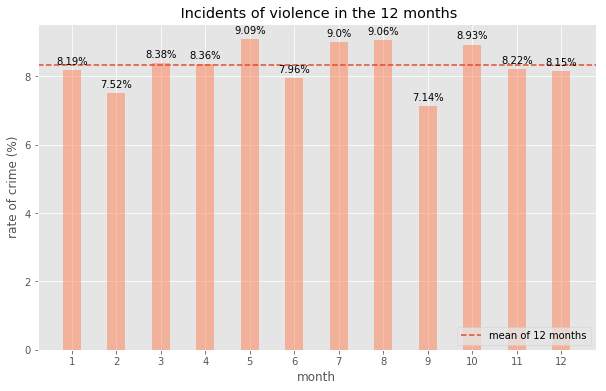

In [552]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager,rc
from matplotlib import style

plt.style.use("ggplot")
x_name=list(data.groupby("month")["year"].groups.keys())
n_groups=len(data.groupby("month")["year"].groups.keys())
y_value=list(month_percentage)
ypos=np.arange(n_groups)+1

fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
rects=plt.bar(ypos,y_value,width=0.4,align="center",color="coral",alpha=0.5)
plt.xticks(x_name)

for i,rect in enumerate(rects):
    ax.text(rect.get_x()+rect.get_width()/2.0,1.02*rect.get_height(),str(y_value[i])+'%',ha="center")
plt.axhline(y=percentage_mean,linestyle='--',label='mean of 12 months')
plt.legend(loc="lower right")
plt.xlabel("month")
plt.ylabel("rate of crime (%)")
plt.title(" Incidents of violence in the 12 months")

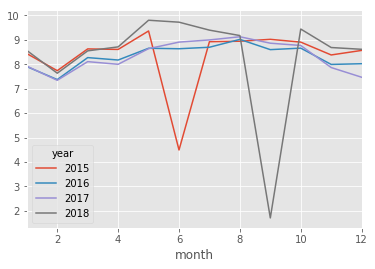

In [556]:
test2=test.unstack().reset_index()
test2.columns=["month","year","counts"]

def show(x):
    x=100*x/x.sum()
    return x
#plot the percentage of crime rate occuring by the  month of the year. 
table=test2.pivot_table("counts",index="month",columns="year").apply(show).plot()


# 4 Summarizing Results 
The first bar graph demonstrates the incidence of crime in the 12 months. Generally, it can be seen that the rate tends to be recorded high in the warmer and hotter time. The figures in the period between May and October are almost above the average and recorded at quite a higher level than any other months. During the seasons, in this part of the country, the temperature usually heats up around May or June.  It is also worthy of noting that there is a quite dramatic leap in the amount between April and May and a drop between October and November. The rate usually keeps decreasing as the state cools off a few degrees, reaching rock bottom at 7.38% in February. We could leap to the conclusion that crime soars along with temperature to some point after which it becomes too hot' and crime rate steadily decreases to reach the lowest score. 

However, this is disputed because our chart shows that the rate for June is below average when the temperature is considered quite as high a 24 degree or 66 Fahrenheit. Its percentage is also considered remarkably lower than in hotter periods. I guessed that some number in any year from 2015 to 2018 is unreasonably lower than thier normal level for some reasons. My initial expectation is right. If you take a closer look at the rate in June of the year 2015, the figure has an absurd record at 4.50 %, which is almost half of the normal rate in this season. This brings down the figure to be below average, distorting the trend we can derive from the data. Apar from this anomalous situation, every June there is at least the same accusation of crime as summer seasons with having the second greatest percentage in the year of 2018.

This simple chart analysis can not make a solid assertion that there must be a link of rising crime to rising temperatures. It is highly doubtable that the temperature alone is the explanation for this phenomenon. Therefore, further research is requested to be undertaken to back up the fact. 
